# **Exploratory Data Analysis Complaint Ticket Data**
by Silmi Aulia Rohmah

# **Data Preparation**

In [ ]:
# pip install psycopg2

In [ ]:
import pandas as pd
import numpy as np
import psycopg2
import missingno as msno
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data from postgresql
conn = psycopg2.connect(
    host="pg-techtest-this-d337.h.aivencloud.com",
    database="defaultdb",
    user="analyst1",
    password="AVNS_qHyTk32MUCpqotPjlpE",
    port="22376"
)

sql = "SELECT * FROM tb_tech_test"

df = pd.read_sql(sql, conn)

conn.close()

<ipython-input-3-220be340a5c9>:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


In [ ]:
df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No;;
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No;;
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes;;
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes;;
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No;;
5,338519,ISP Charging for arbitrary data limits with ov...,6/12/2015,6-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No;;
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No;;
7,359792,Disney refuses to help troubleshoot and correc...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No;;
8,318072,Disney extended outages,6/1/2015,6-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No;;
9,371214,Disney Raising Prices and Not Being Available ...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes;;


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ticket #                       2224 non-null   object
 1   Customer Complaint             2106 non-null   object
 2   Date                           2106 non-null   object
 3   Date_month_year                2106 non-null   object
 4   Time                           2106 non-null   object
 5   Received Via                   2106 non-null   object
 6   City                           2106 non-null   object
 7   State                          2106 non-null   object
 8   Zip code                       2106 non-null   object
 9   Status                         2106 non-null   object
 10  Filing on Behalf of Someone;;  2106 non-null   object
dtypes: object(11)
memory usage: 191.3+ KB


In [ ]:
# rename column
df = df.rename(columns={"Ticket #": "Ticket", "Date_month_year": "Date Month Year", "Zip code": "Zip Code", "Filing on Behalf of Someone;;" : "Filing on Behalf of Someone" })

In [ ]:
df.describe()

,Ticket,Customer Complaint,Date,Date Month Year,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
count,2224,2106,2106,2106,2106,2106,2106,2106,2106,2106,2106
unique,2224,1714,91,91,2076,2,899,43,1489,4,4
top,250635,Disney,24-06-15,24-Jun-15,9:50:41 PM,Customer Care Call,Atlanta,Georgia,30188,Solved,No;;
freq,1,102,204,204,2,1058,60,273,8,928,1910


# **Data Cleaning**

In [ ]:
# Check missing value
df.isnull().sum()

,0
Ticket,0
Customer Complaint,118
Date,118
Date Month Year,118
Time,118
Received Via,118
City,118
State,118
Zip Code,118
Status,118


<Axes: >

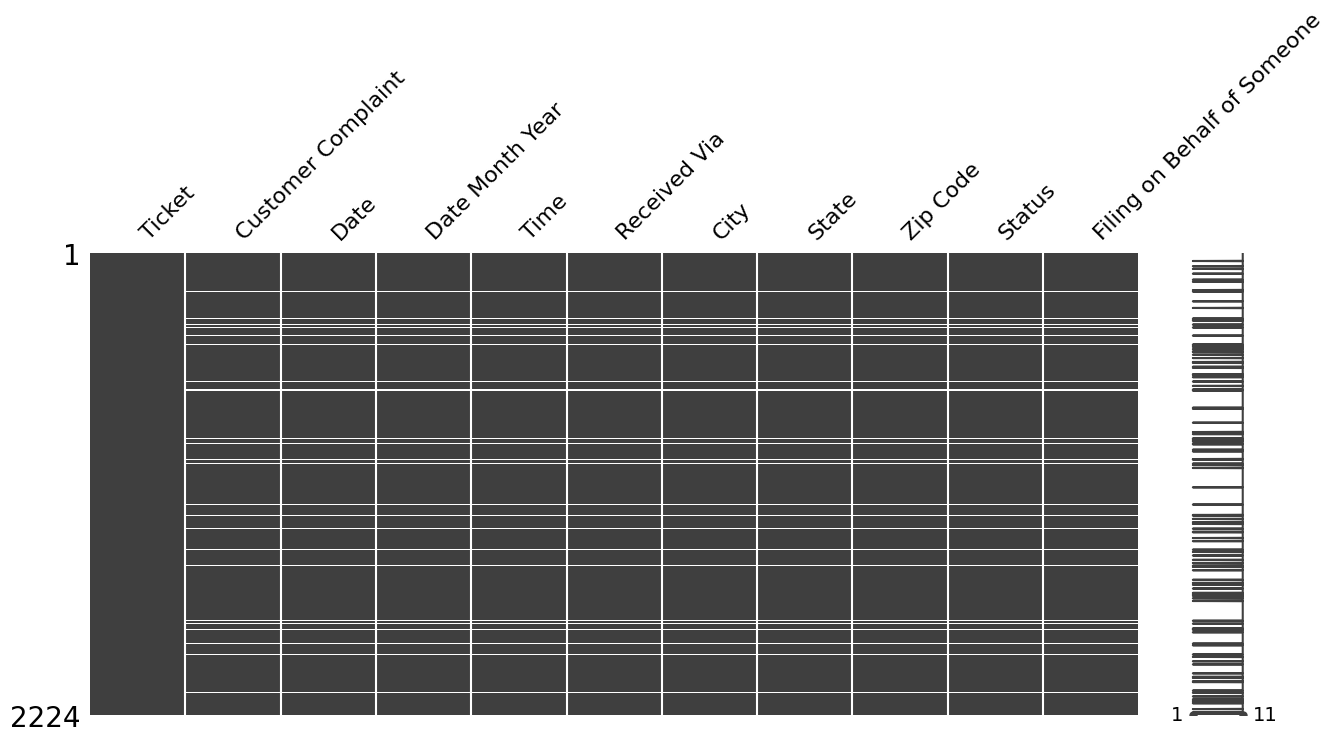

In [ ]:
# check the distribution of missing value
msno.matrix(df, figsize=(15, 6))

The matrix show that missing values occur at the same row indices across different columns

In [ ]:
# check rows with missing value
missing_value_rows = df[df.loc[:, df.columns != 'Ticket'].isna().all(axis=1)]
df.loc[missing_value_rows.index]

,Ticket,Customer Complaint,Date,Date Month Year,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
38,"300824,""INTERNET , BILLING AND SERVIE ISSUES"",...",None,None,None,None,None,None,None,None,None,None
63,"356118,""Disney - failure to provide service, r...",None,None,None,None,None,None,None,None,None,None
76,"231292,""Disney data cap """"trials"""""",04-12-15,0...",None,None,None,None,None,None,None,None,None,None
99,"322511,""Disney bandwidth data caps in Atlanta,...",None,None,None,None,None,None,None,None,None,None
128,"370846,""Disney deceptive advertising, overage ...",None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2166,"358985,""Monthly bill increased, service decrea...",None,None,None,None,None,None,None,None,None,None
2194,"270923,""Xfinity corporate bullying, breach of ...",None,None,None,None,None,None,None,None,None,None
2210,"228198,""Disney customer service, and billing i...",None,None,None,None,None,None,None,None,None,None
2218,"338192,""Speed throttling, speeds not at promis...",None,None,None,None,None,None,None,None,None,None


Except for the ticket column, all other columns are null because the data is merged into a single string in the ticket column.

In [ ]:
# split the value in ticket column to its right column

# function to split a string while respecting quoted commas
def split_quoted_string(s):
    return next(csv.reader([s], quotechar='"', skipinitialspace=True))

# now split merged string in ticket column only to merged value rows
df.loc[missing_value_rows.index, [
    'Ticket', 'Customer Complaint', 'Date', 'Date Month Year',
    'Time', 'Received Via', 'City', 'State', 'Zip Code',
    'Status', 'Filing on Behalf of Someone']] = df.loc[missing_value_rows.index, 'Ticket'].apply(split_quoted_string).tolist()

In [ ]:
# check result of split
df.loc[missing_value_rows.index]

,Ticket,Customer Complaint,Date,Date Month Year,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
38,300824,"INTERNET , BILLING AND SERVIE ISSUES",21-05-15,21-May-15,9:34:19 AM,Customer Care Call,Ambridge,Pennsylvania,15003,Open,No;;
63,356118,"Disney - failure to provide service, refusal t...",22-06-15,22-Jun-15,2:41:05 PM,Customer Care Call,Arlington,Virginia,22206,Solved,No;;
76,231292,"Disney data cap ""trials""",04-12-15,04-Dec-15,3:45:26 PM,Internet,Atlanta,Georgia,30316,Closed,No;;
99,322511,"Disney bandwidth data caps in Atlanta, GA",06-03-15,06-Mar-15,11:59:33 PM,Internet,Atlanta,Georgia,30341,Closed,Yes;;
128,370846,"Disney deceptive advertising, overage charges",28-06-15,28-Jun-15,12:08:05 PM,Internet,Atlanta,Georgia,30329,Pending,No;;
...,...,...,...,...,...,...,...,...,...,...,...
2166,358985,"Monthly bill increased, service decreased",23-06-15,23-Jun-15,3:34:21 PM,Customer Care Call,West St Paul,Minnesota,55118,Solved,No;;
2194,270923,"Xfinity corporate bullying, breach of contract",05-03-15,05-Mar-15,11:11:40 PM,Customer Care Call,Woodbridge,Virginia,22191,Closed,No;;
2210,228198,"Disney customer service, and billing issues",04-10-15,04-Oct-15,10:15:03 AM,Customer Care Call,Wrightstown,New Jersey,8562,Closed,No;;
2218,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes;;


In [ ]:
# fix format date and convert to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Date Month Year'] = pd.to_datetime(df['Date Month Year'], errors='coerce')

<ipython-input-13-f156319f7f59>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-13-f156319f7f59>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Month Year'] = pd.to_datetime(df['Date Month Year'], errors='coerce')


In [ ]:
df.head()

,Ticket,Customer Complaint,Date,Date Month Year,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No;;
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No;;
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes;;
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes;;
4,307175,Disney not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No;;


In [ ]:
# check if there is a difference in dates between the results of to_datetime on both columns
check_date = (df['Date'] != df['Date Month Year']).sum()
check_date

0

In [ ]:
# because the date on both column is the same now, drop one of them
df.drop(columns=['Date Month Year'], inplace=True)

In [ ]:
# change format time to 24h
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time

In [ ]:
df['Filing on Behalf of Someone'].unique()

array(['No;;', 'Yes;;', 'No;', 'No'], dtype=object)

In [ ]:
# standardize the value
df['Filing on Behalf of Someone'] = df['Filing on Behalf of Someone'].str.replace(';;', '').str.replace(';', '')

In [ ]:
df.head()

,Ticket,Customer Complaint,Date,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,2015-04-22,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,2015-07-05,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Disney not working and no service to boot,2015-05-26,13:25:26,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
# convert to numeric
df['Ticket'] = pd.to_numeric(df['Ticket'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
Ticket,1
Customer Complaint,0
Date,0
Time,0
Received Via,0
City,0
State,0
Zip Code,0
Status,0
Filing on Behalf of Someone,0


In [ ]:
df[df['Ticket'].isnull()]

,Ticket,Customer Complaint,Date,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
1036,NaN,nd intrenal miscommunication,2015-04-30,21:55:33,Customer Care Call,Kingston Springs,Tennessee,37082,Closed,No


Ticket record in index 1036 is NaN, it means that the ticket value before we convert it is a non-numeric value (string)

In [ ]:
# because ticket column is a primary  key and must be unique, so we can drop it because its value is null
df = df.dropna(subset=['Ticket'])

In [ ]:
# check for duplicate data
df.duplicated().sum()

0

In [ ]:
df.sample(15)

,Ticket,Customer Complaint,Date,Time,Received Via,City,State,Zip Code,Status,Filing on Behalf of Someone
190,360806.0,Disneys Shady Business Practices,2015-06-24,03:43:45,Internet,Battle Ground,Washington,98604,Open,Yes
370,327649.0,Disney wrongfully autodrafted a final bill tha...,2015-07-06,20:27:03,Customer Care Call,Charleston,South Carolina,29403,Closed,Yes
1266,265456.0,Disney complaint,2015-04-29,21:07:55,Internet,Miami,Florida,33147,Closed,No
210,260284.0,Disney internet for low income families,2015-04-27,20:57:16,Customer Care Call,Belvidere,Illinois,61008,Closed,No
1555,362208.0,Unfair Billing at Disney,2015-06-24,14:41:24,Customer Care Call,Philadelphia,Pennsylvania,19118,Solved,Yes
1393,360239.0,Disney is stealing from me,2015-06-23,21:45:51,Customer Care Call,Nashville,Tennessee,37211,Solved,No
1205,360185.0,Disney Throttling Internet,2015-06-23,21:26:30,Internet,Margate,New Jersey,8402,Open,Yes
1077,360358.0,Disney Costs,2015-06-23,22:29:07,Internet,Knoxville,Tennessee,37916,Open,No
2206,360908.0,Issues with Disney billing and equipment,2015-06-24,08:00:17,Internet,Woodstock,Georgia,30188,Solved,No
592,373429.0,Disney service,2015-06-29,18:48:08,Customer Care Call,Detroit,Michigan,48202,Open,No


# **Data Analysis & Visualization**

## When Do Customers Complain the Most?

Trend Complaint per Month: Date
January        55
February       59
March          45
April         374
May           317
June         1046
July           49
August         67
September      55
October        53
November       38
December       65
dtype: int64


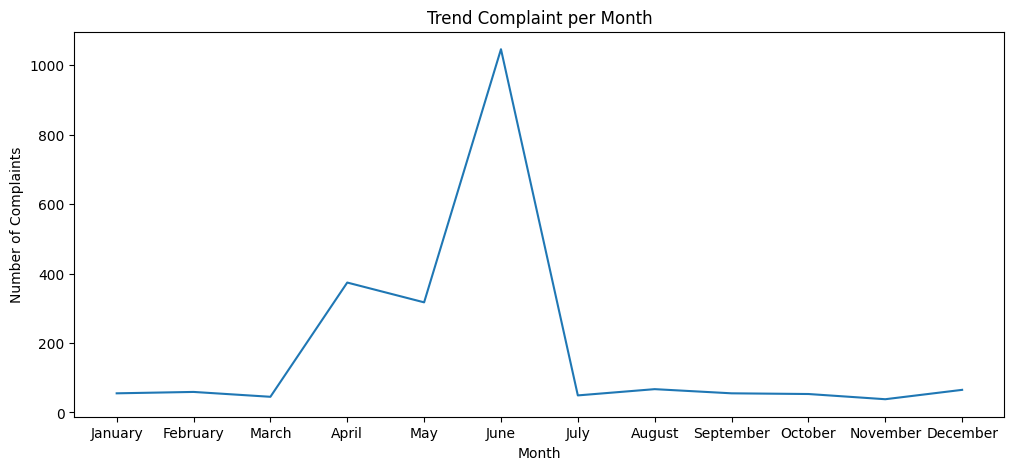

In [ ]:
# number of complaints received by month in 2015
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

trend_complaint_month = df.groupby(df['Date'].dt.strftime('%B')).size().reindex(month_order)
print(f"Trend Complaint per Month: {trend_complaint_month}")

plt.figure(figsize=(12, 5))
sns.lineplot(x=trend_complaint_month.index, y=trend_complaint_month.values)
plt.title('Trend Complaint per Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.show()

Trend Complaint per Day of the Week: Date
Monday       256
Tuesday      464
Wednesday    441
Thursday     330
Friday       290
Saturday     214
Sunday       228
dtype: int64


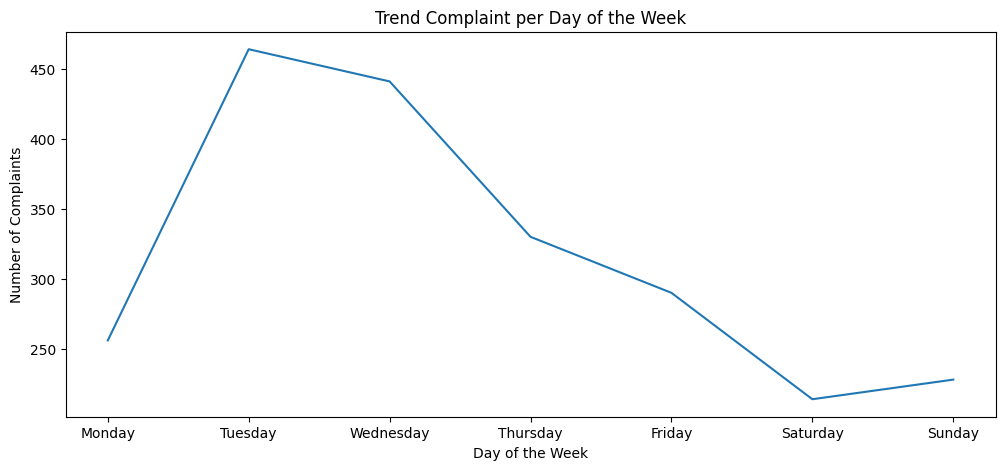

In [ ]:
# number of complaints received by day of the week in 2015
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trend_complaint_day = df.groupby(df['Date'].dt.day_name()).size().reindex(day_order)
print(f"Trend Complaint per Day of the Week: {trend_complaint_day}")

plt.figure(figsize=(12, 5))
sns.lineplot(x=trend_complaint_day.index, y=trend_complaint_day.values)
plt.title('Trend Complaint per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Complaints')
plt.show()

Customer mostly complaint in weekday

Time
Day      1521
Night     702
Name: count, dtype: int64


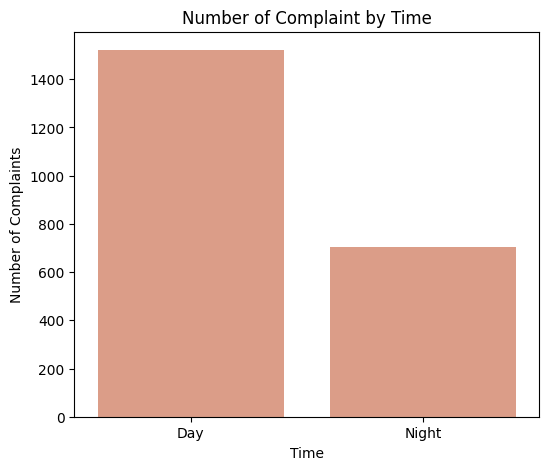

In [ ]:
# number of complaint received in day and night
def time_category(time):
    if 6 <= time.hour <= 18:
        return 'Day'
    else:
        return 'Night'

complaint_by_time = df['Time'].apply(time_category).value_counts()
print(complaint_by_time)

plt.figure(figsize=(6, 5))
sns.barplot(x=complaint_by_time.index, y=complaint_by_time.values, color='darksalmon')
plt.title('Number of Complaint by Time')
plt.xlabel('Time')
plt.ylabel('Number of Complaints')
plt.show()

## Where complaint coming from?

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       142
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
Name: count, dtype: int64


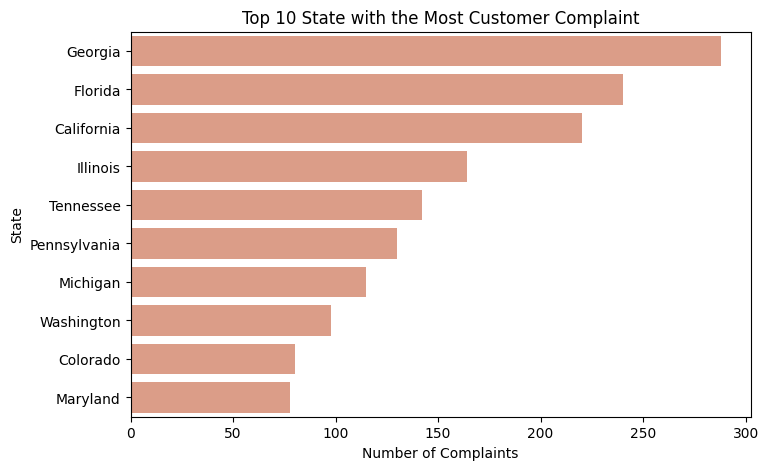

In [ ]:
# Top 10 state with the most custumer complaint
top_state = df['State'].value_counts().head(10)
print(top_state)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_state.values, y=top_state.index, color='darksalmon')
plt.title('Top 10 State with the Most Customer Complaint')
plt.ylabel('State')
plt.xlabel('Number of Complaints')
plt.show()

City
Atlanta         63
Chicago         47
Knoxville       36
Houston         33
Jacksonville    31
Philadelphia    25
Denver          22
Nashville       22
Miami           22
Indianapolis    21
Name: count, dtype: int64


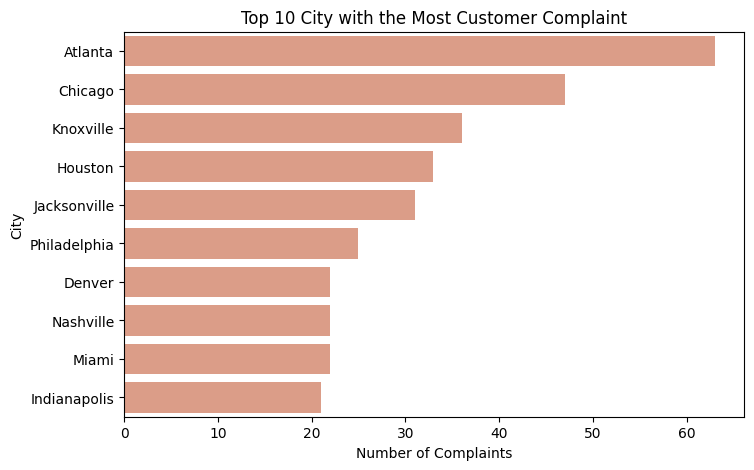

In [ ]:
# Top 10 City with the most custumer complaint
top_city = df['City'].value_counts().head(10)
print(top_city)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_city.values, y=top_city.index, color='darksalmon')
plt.title('Top 10 City with the Most Customer Complaint')
plt.ylabel('City')
plt.xlabel('Number of Complaints')
plt.show()

## How Are Customers Submitting for Complaints?

Received Via
Customer Care Call    1118
Internet              1105
Name: count, dtype: int64


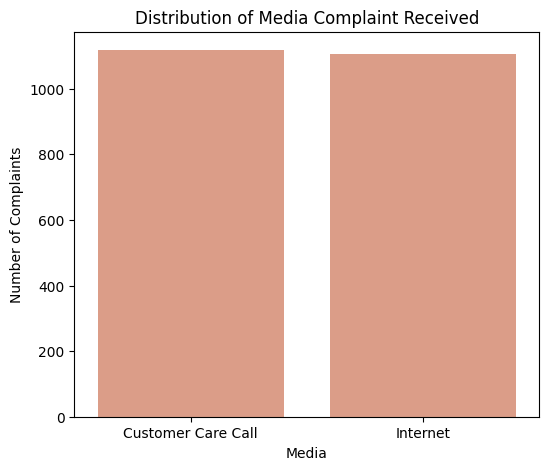

In [ ]:
# complaint method
complaint_media = df['Received Via'].value_counts()
print(complaint_media)

plt.figure(figsize=(6, 5))
sns.barplot(x=complaint_media.index, y=complaint_media.values, color='darksalmon')
plt.title('Distribution of Media Complaint Received')
plt.xlabel('Media')
plt.ylabel('Number of Complaints')
plt.show()

Status
Solved     973
Closed     733
Open       363
Pending    154
Name: count, dtype: int64


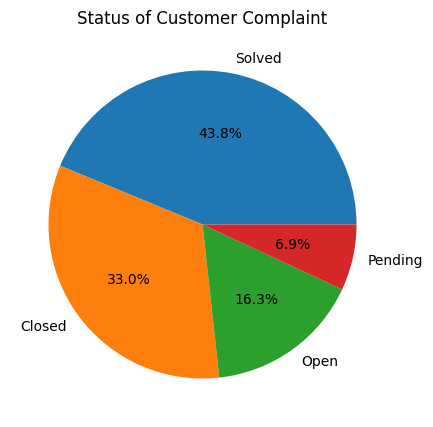

In [ ]:
# status of customer complaint
complaint_status = df['Status'].value_counts()
print(complaint_status)

plt.figure(figsize=(6, 5))
plt.pie(complaint_status.values, labels=complaint_status.index, autopct='%1.1f%%')
plt.title('Status of Customer Complaint')
plt.show()

         Received Via   Status  Count
0  Customer Care Call   Closed    386
1  Customer Care Call     Open    186
2  Customer Care Call  Pending     69
3  Customer Care Call   Solved    477
4            Internet   Closed    347
5            Internet     Open    177
6            Internet  Pending     85
7            Internet   Solved    496


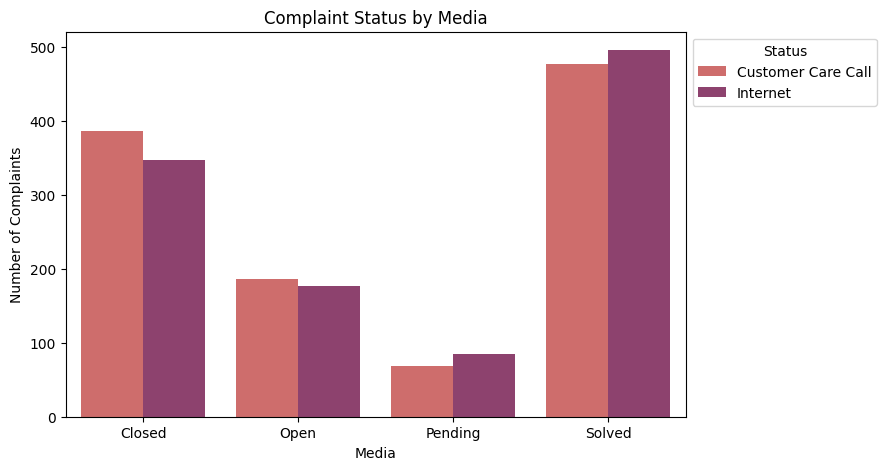

In [ ]:
# is there a difference in complaint status based on complaint method?
complaint_status_bymedia = df.groupby(['Received Via', 'Status']).size().reset_index(name='Count')
print(complaint_status_bymedia)

plt.figure(figsize=(8, 5))
sns.barplot(data=complaint_status_bymedia, x='Status', y='Count', hue='Received Via', palette='flare')
plt.title('Complaint Status by Media')
plt.xlabel('Media')
plt.ylabel('Number of Complaints')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Filing on Behalf of Someone
No     2020
Yes     203
Name: count, dtype: int64


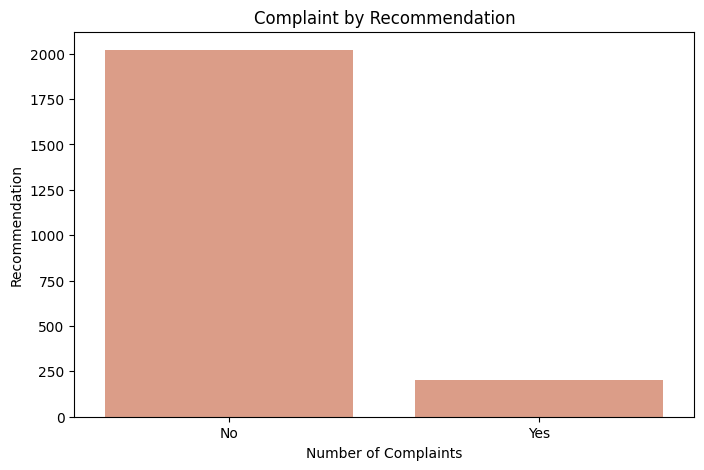

In [ ]:
# do Referred Customers Complain More?
complaint_by_recommendation = df['Filing on Behalf of Someone'].value_counts()
print(complaint_by_recommendation)

plt.figure(figsize=(8, 5))
sns.barplot(x=complaint_by_recommendation.index, y=complaint_by_recommendation.values, color='darksalmon')
plt.title('Complaint by Recommendation')
plt.ylabel('Recommendation')
plt.xlabel('Number of Complaints')
plt.show()

## What is The Common Issues?



---



In [ ]:
categories = {
    'Technical & Connectivity Issues': ['internet', 'speed', 'disconnect', 'connect', 'wifi', 'slow', 'data cap', 'limit', 'usage', 'rate', 'cable', 'blocking'],
    'Billing & Payment Issues': ['bill', 'billing', 'price', 'charge', 'cost', 'refund', 'overbilling', 'pay', 'unfair', 'bundle', 'fraud'],
    'Customer Service & Policy Issues': ['service', 'outage', 'support', 'customer', 'help', 'disney', 'policy', 'agent', 'monopoly', 'scam'],
}

In [ ]:
def categorize_complaint(complaint):
    complaint = complaint.lower()
    for category, keywords in categories.items():
        if any(keyword in complaint for keyword in keywords):
            return category
    return 'Other'

df['Category'] = df['Customer Complaint'].apply(categorize_complaint)

pd.set_option('display.max_colwidth', None)
# df.sample(10)

Category
Technical & Connectivity Issues     912
Customer Service & Policy Issues    626
Billing & Payment Issues            511
Other                               174
Name: count, dtype: int64


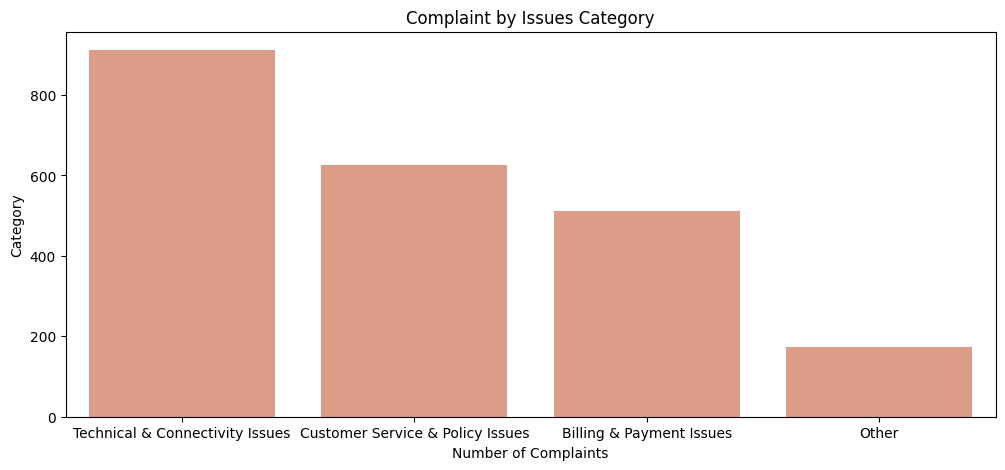

In [ ]:
complaint_category = df['Category'].value_counts()
print(complaint_category)

plt.figure(figsize=(12, 5))
sns.barplot(x=complaint_category.index, y=complaint_category.values, color='darksalmon')
plt.title('Complaint by Issues Category')
plt.ylabel('Category')
plt.xlabel('Number of Complaints')
plt.show()

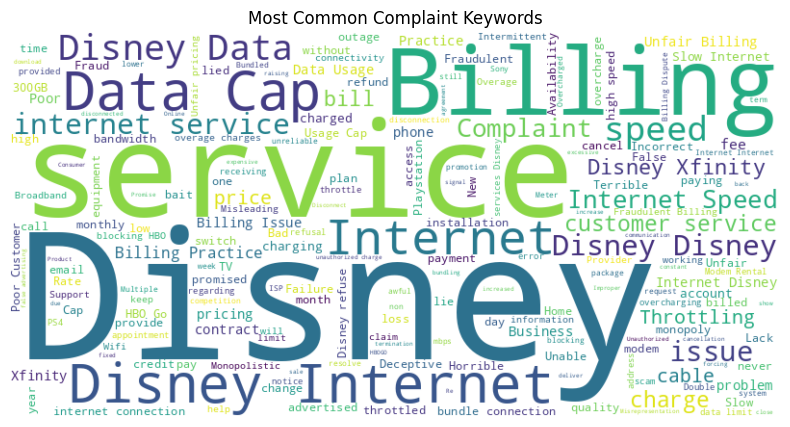

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(df['Customer Complaint'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Complaint Keywords")
plt.show()


In [ ]:
# export to excel
df.to_excel('complaint_ticket_data.xlsx', index=False)